# Linear Models: Linear Regression / Polinomial Regression

[A Visual Introduction To Linear Regression](https://mlu-explain.github.io/linear-regression/)

## Мінімізація емпіричного ризику 

    
Розгляньмо наступну ситуацію, яка є загальною постановкою для багатьох задач *supervised learning (навчання з учителем)*. Ми маємо два простори об'єктів, $X$ та $Y$, і хотіли би навчитися функції $\ h: X \to Y$ (яку часто називають гіпотезою), яка видає об'єкт $y \in Y$ для заданого $x \in X$. Для здійснення цього ми маємо у своєму розпорядження тренувальний набір із невеликої кількості зразків $\ (x_1, y_1), \ldots, (x_m, y_m)$, де $x_i \in X$ є входом, а $y_i \in Y$ є відповідним відгуком, який ми хотіли би отримувати від $\ h(x_i)$.

Цільова змінна $Y$ може бути:
* категоріальна – задача класифікації;
* неперервна - задача регресії;
* порядкова - задача ранжирування.

*Предиктивна модель* - це параметричне сімейство функцій (гіпотез):

$$\large \mathcal{H} = \left\{ h\left(x, \theta\right) | \theta \in \Theta \right\}$$

* де
    * $\large h: X \times \Theta \rightarrow Y$    
    * $\large \Theta$ - множина параметрів

Висловлюючись формальніше, ми припускаємо, що існує [спільний розподіл імовірності](https://uk.wikipedia.org/wiki/%D0%A1%D0%BF%D1%96%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BF%D0%BE%D0%B4%D1%96%D0%BB) $P(x, y)$ над $X$ та $Y$, і що тренувальний набір складається з $m$ зразків $\ (x_1, y_1), \ldots, (x_m, y_m)$, [незалежних і однаково-розподілених](https://uk.wikipedia.org/wiki/%D0%9D%D0%B5%D0%B7%D0%B0%D0%BB%D0%B5%D0%B6%D0%BD%D1%96_%D0%BE%D0%B4%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2%D0%BE_%D1%80%D0%BE%D0%B7%D0%BF%D0%BE%D0%B4%D1%96%D0%BB%D0%B5%D0%BD%D1%96_%D0%B2%D0%B8%D0%BF%D0%B0%D0%B4%D0%BA%D0%BE%D0%B2%D1%96_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D0%B8) із $P(x, y)$. Зауважте, що припущення про спільний розподіл імовірності дозволяє нам моделювати невизначеність у передбаченнях (наприклад, від шуму в даних), оскільки $y$ є не детермінованою функцією $x$, а радше випадковою змінною з умовним розподілом $P(y | x)$ для зафіксованого $x$.

Ми також припускаємо, що нам було надано невід'ємну дійснозначну функцію втрат $L(\hat{y}, y)$, яка вимірює, наскільки передбачення гіпотези $\hat{y}$ відрізняється від справжнього виходу $y$. Тоді ризик, пов'язаний із гіпотезою $h(x)$, визначається як [математичне сподівання](https://uk.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D1%81%D0%BF%D0%BE%D0%B4%D1%96%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F) функції втрат:

$$\large R(h) = \mathbf{E}[L(h(x), y)] = \int L(h(x), y)\,dP(x, y) $$


В загальному випадку ризик $R(h)$ не може бути обчислено, оскільки розподіл $P(x, y)$ не є відомим алгоритмові навчання. Проте ми можемо обчислювати наближення, яке називається __*емпіричним ризиком*__, шляхом усереднення функції втрат на тренувальному наборі:

$$\large R_\text{emp}(h) = \frac{1}{m} \sum_{i=1}^m L(h(x_i), y_i)$$

Принцип *мінімізації емпіричного ризику* стверджує, що алгоритм навчання повинен вибрати таку гіпотезу $\hat{h}$, яка мінімізує емпіричний ризик:

$$\large \hat{h} = \arg \min_{h \in \mathcal{H}} R_{\text{emp}}(h)$$

Таким чином, алгоритм навчання, визначений принципом мінімізації емпіричного ризику, полягає у розв'язання наведеної вище задачі оптимізації.


Приклади функцій втрат : 
* індекаторна функція (персептрон): $\large L\left(\hat{y}, y\right) = \text{I}\left[\hat{y} = y\right]$
* регресія: $\large L\left(\hat{y}, y\right) = \left(\hat{y} - y\right)^2$



Головним недоліком принципу мінімізації емпіричного ризику є __*перенавчання (overfiting)*__:

* ми говоримо, що модель має [*узагальнюючу здатність (generalization)*](https://uk.wikipedia.org/wiki/%D0%9F%D0%BE%D1%85%D0%B8%D0%B1%D0%BA%D0%B0_%D1%83%D0%B7%D0%B0%D0%B3%D0%B0%D0%BB%D1%8C%D0%BD%D0%B5%D0%BD%D0%BD%D1%8F) якщо ймовірність помилки на тестовій множині даних (можина прикладів, яка не брала участь у навчанні в жодному вигляді) мала або прогнозована;
* *перенавчання* проявляється в тому, що модель показує хороші результати на навчальній множині та погані на тестовій. Такі моделі не мають узагальнюючої здатності.

In [39]:
# plot graphics in the notebook 
%matplotlib inline

import numpy as np
import pandas as pd

# make experiments reproducible
np.random.seed(12345)
# extension of main plotting library matplotlib
import seaborn as sns
# main library for plotting
import matplotlib.pyplot as plt
# set style
plt.style.use("fivethirtyeight")
# set default size of plots
plt.rcParams['figure.figsize'] = 16, 10

In [40]:
def generate_wave_set(n_support=1000, n_train=25, n_test=25, std=0.1):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    
    # same for test set
    data['x_test'] = np.sort(np.random.choice(data['support'], size=n_test, replace=True))
    data['y_test'] = np.sin(data['x_test']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

In [41]:
# sample 25 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, n_train=25, n_test=25)
print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

Shape of X is (25,)
Head of X is [0.48428956 0.57234221 0.66039485 0.74215802 0.81134225 1.30821075
 1.67928977 1.79250031 1.98118456 2.2453425 ]


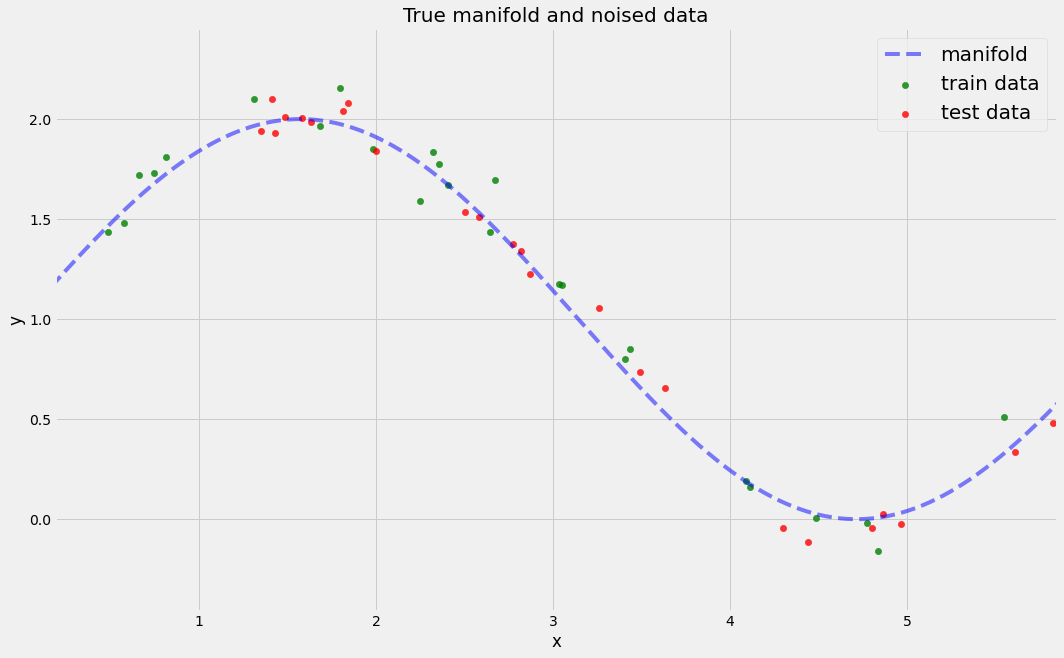

In [42]:
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='train data')
plt.scatter(data['x_test'], data['y_test'], 40, 'r', 'o', alpha=0.8, label='test data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Лінійна регресія

Обмежимо простір гіпотез множиною лінійних функцій від аргументу розмірності $\large \left(m + 1 \right)$, зміщення(bias) ($ \large x_0 = 1 $) і один параметр на кожну ознаку:

$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) &=& w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m \\
&=& \sum_{i=0}^m w_i x_i \\
&=& \vec{x}^T \vec{w}
\end{array}$$
де:
* $\large \vec{x} \in \mathbb{R}^{m + 1}$

Тоді емпіричний ризик набуває вигляду середньоквадратичної помилки:
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}$$
де:
* $\large \vec{w} \in \mathbb{R}^{m + 1}$
* $\large \vec{y} \in \mathbb{R}^n$
* $\large X$ це $\large n \times m + 1$ матриця, де кожен рядок це вектор ознак.

In [43]:
# add column of ones to the first position
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Top rows of X')
print(X[:5, :])

Top rows of X
[[1.         0.48428956]
 [1.         0.57234221]
 [1.         0.66039485]
 [1.         0.74215802]
 [1.         0.81134225]]


Виведемо алгоритм навчання. Скористаємося тим фактом, що функція вартості в даному випадку є опуклою, це дозволить нам знайти глобальний оптимум. Щоб вирішити цю задачу оптимізації, нам потрібно обчислити похідні відносно параметрів моделі. Ми прирівнюємо їх до нуля і розв’язуємо отримане рівняння для $w$
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\
&=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)
\end{array}$$


Таке рішення називається методом найменших квадратів (МНК):
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}$$

МНК рішення має цікаві властивості, які можна знайти в теоремі [Гаусса-Маркова](https://uk.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0).

In [44]:
# linear algebra magic of numpy
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])

In [45]:
print('Fitted params')
print(w)

Fitted params
[ 2.33512272 -0.41939554]


In [46]:
h = np.dot(w, X.T)

Test data:

In [47]:
X_test = np.array([np.ones(data['x_test'].shape[0]), data['x_test']])
h_test = np.dot(w, X_test)

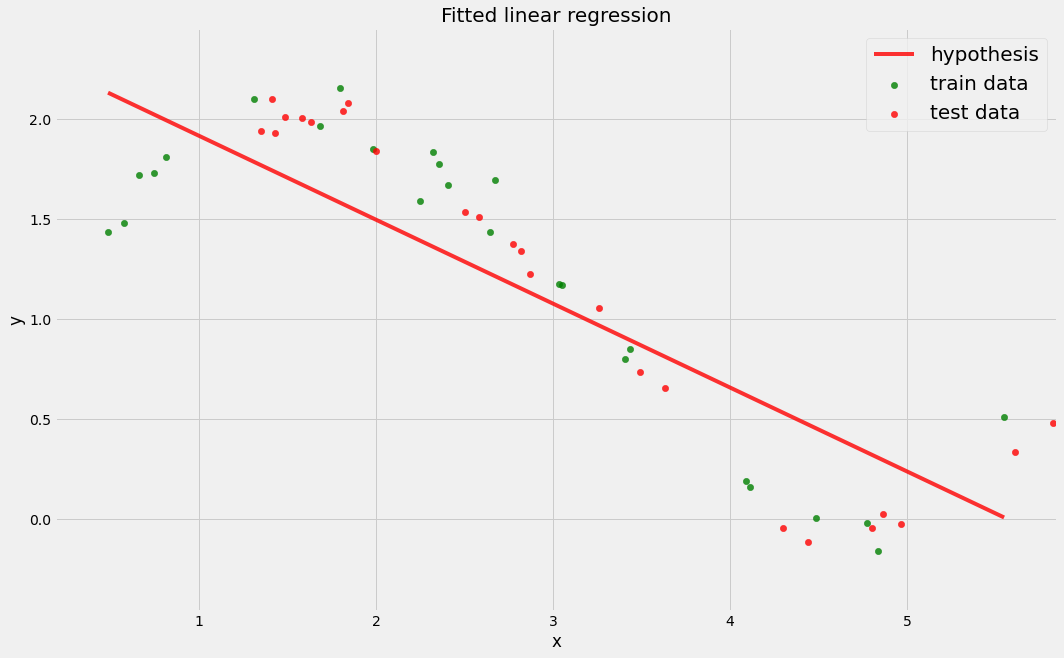

In [48]:
margin = 0.3
# plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='train data')
plt.scatter(data['x_test'], data['y_test'], 40, 'r', 'o', alpha=0.8, label='test data')

plt.plot(data['x_train'], h, 'r', alpha=0.8, label='hypothesis')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
np.mean((data['y_train'] - h)**2)

0.15308575081318787

In [12]:
np.mean((data['y_test'] - h_test)**2)

0.1418172792430862

## Ймовірнісна інтерпретація
Виникає питання, чому ми вибираємо мінімізацію середньої квадратичної помилки $L\left(\hat{y}, y\right) = \left(\hat{y} - y\right)^2$ замість чогось іншого? Зрештою, можна мінімізувати середнє абсолютне значення помилки $L\left(\hat{y}, y\right) = \left|\hat{y} - y\right|$

Розглянемо лінійну регресію у наступному вигляді:

$$\large \vec y = \vec{x}^T \vec{w} + \epsilon,$$

вважатимемо, що випадкові помилки $\epsilon$ беруться із центрованого [нормального розподілу](https://uk.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BF%D0%BE%D0%B4%D1%96%D0%BB)


$$\large \epsilon_i \sim \mathcal{N}\left(0, \sigma^2\right)$$

Перепишемо модель:

$$\large \begin{array}{rcl} 
y_i &=& \sum_{j=0}^m w_j X_{ij} + \epsilon_i \\
&\sim& \sum_{j=0}^m w_j  X_{ij} + \mathcal{N}\left(0, \sigma^2\right) \\
p\left({y_i} \mid X; \vec{w} \right) &=& \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right)
\end{array}$$

Так як приклади беруться незалежно (помилки не скорельовані - одна з умов теореми Маркова-Гаусса, то повна [правдоподібність даних](https://uk.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D1%96%D1%8F_%D0%BF%D1%80%D0%B0%D0%B2%D0%B4%D0%BE%D0%BF%D0%BE%D0%B4%D1%96%D0%B1%D0%BD%D0%BE%D1%81%D1%82%D1%96) буде виглядати як добуток функцій густин ймовірностей $p\left(y_i\right)$. Розглянемо логарифм правдоподібності, що дозволить нам перейти від добутку до суми:

$$\Large \begin{array}{rcl} 
\log p\left({y_i} \mid X; \vec{w}\right) &=& \log \prod_{i=1}^n \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right) \\
&=& \sum_{i=1}^n \log \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right) \\
&=& -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{x}^T \vec{x}_i\right)^2
\end{array}$$

Скористуємось [методом максимальної правдоподібності](https://uk.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%97_%D0%BF%D1%80%D0%B0%D0%B2%D0%B4%D0%BE%D0%BF%D0%BE%D0%B4%D1%96%D0%B1%D0%BD%D0%BE%D1%81%D1%82%D1%96), який пропонує оцінювати невідомі параметри шляхом максимізації функції правдоподібності. Нам потрібно максимізувати вираз $p\left(\vec{y} \mid  X; \vec{w}\right)$ по вектору $\vec w$, отримавши при цьому $ \hat w$. Зверніть увагу, що при максимізації функції за якимсь параметром можна викинути всі члени, які не залежать від цього параметра:


$$\Large \begin{array}{rcl} 
\hat{w} &=& \arg \max_{\textbf w} p\left(\vec{y}\mid  X; \vec{w}\right) = \arg \max_{\textbf w} \log p\left(\vec{y}\mid X; \vec{w}\right)\\
&=& \arg \max_{\textbf w} -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^{\text{T}} \vec{x}_i\right)^2 \\
&=& \arg \max_{\textbf w} -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^{\text{T}} \vec{x}_i\right)^2 \\
&=&  \arg \max_{\textbf w} \mathcal{L}\left( X, \vec{y}, \vec{w} \right)
\end{array}$$

Таким чином, ми побачили, що максимізація правдоподібності даних – це те саме, що й мінімізація середньоквадратичної помилки (за справедливості зазначених вище припущень). Виходить, що саме така функція втрат є наслідком того, що помилка розподілена нормально, а не інакше.

# Поліноміальна регресія


Розширимо множину гіпотез до множини поліномів ступеня $\large p$. Для кількості ознак $ \large m = 1 $ множина гіпотез буде:
$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\
&=& \sum_{i=0}^p w_i x^i
\end{array}$$

Все інше залишимо так як є

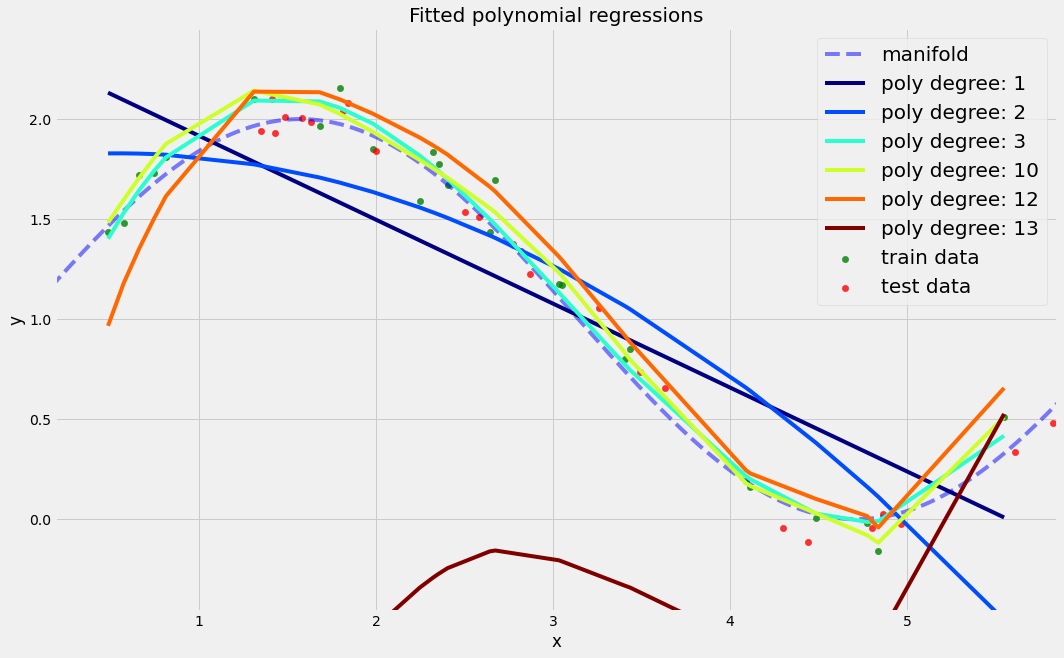

In [13]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='train data')
plt.scatter(data['x_test'], data['y_test'], 40, 'r', 'o', alpha=0.8, label='test data')

# save weights of all fitted polynomial regressions
w_list = []
train_err = []
test_err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist_train = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: np.power(data['x_train'], n), range(1, degree + 1)))
    dlist_test = [np.ones(data['x_test'].shape[0])] + \
            list(map(lambda n: np.power(data['x_test'], n), range(1, degree + 1)))
    X = np.array(dlist_train).T
    X_test = np.array(dlist_test).T
    
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    
    w_list.append((degree, w))
    
    h = np.dot(w, X.T)
    h_test = np.dot(w, X_test.T)
    train_err.append(np.mean((data['y_train'] - h)**2))
    test_err.append(np.mean((data['y_test'] - h_test)**2))
    
#     dlist_all = [np.ones(data['support'].shape[0])] + \
#             list(map(lambda n: np.power(data['support'], n), range(1, degree + 1)))
#     X_all = np.array(dlist_all).T
#     h = np.dot(w, X_all.T)
#     plt.plot(data['support'], h, color=colors[ix], label='poly degree: %i' % degree)

    plt.plot(data['x_train'], h, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [14]:
results = pd.DataFrame({"degree": degree_list, "train_err": train_err, "test_err": test_err})
results

,degree,train_err,test_err
0,1,0.153086,0.141817
1,2,0.114404,0.258078
2,3,0.008543,0.017522
3,10,0.006792,4.523778
4,12,0.035437,75.111332
5,13,9.431567,2053.392058


In [15]:
results = results.iloc[:-1, :]

Text(0, 0.5, 'error')

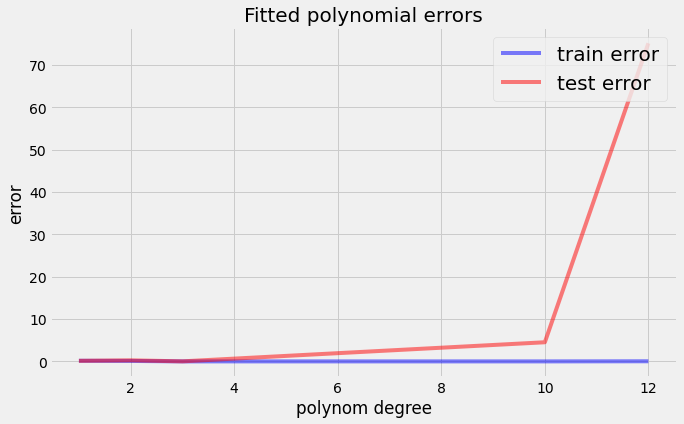

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(results['degree'], results['train_err'], 'b', alpha=0.5, label='train error')
plt.plot(results['degree'], results['test_err'], 'r', alpha=0.5, label='test error')
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial errors', fontsize=20)
plt.xlabel('polynom degree')
plt.ylabel('error')

/Users/terpiljenya/projects/machine_learning_projector/venv/lib/python3.7/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/terpiljenya/projects/machine_learning_projector/venv/lib/python3.7/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<AxesSubplot:>

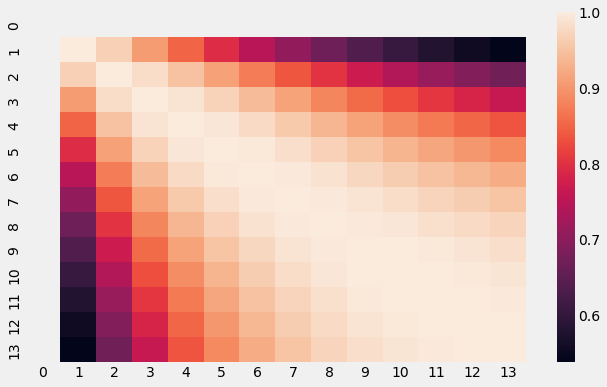

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(np.corrcoef(X.T))

In [18]:
# eigenvalues for poly-13 features, we can see multicollinearity
np.linalg.eigvals(np.dot(X.T, X))

array([ 2.41689057e+19,  1.13604433e+15,  1.52784980e+11,  1.12653366e+08,
        2.86163648e+05,  2.29556533e+03,  3.59744392e+01,  5.70922546e+00,
       -8.45710061e-01,  4.66840160e-01,  4.73206250e-02,  2.63835163e-03,
        6.13043980e-06, -2.59270410e-05])

Для тестування на лінійну залежність або мультиколлінеарність можна використовувати [число обумовленості](https://uk.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%BE_%D0%BE%D0%B1%D1%83%D0%BC%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BE%D1%81%D1%82%D1%96#:~:text=%D0%A7%D0%B8%D1%81%D0%BB%D0%BE%20%D0%BE%D0%B1%D1%83%D0%BC%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BE%D1%81%D1%82%D1%96%20%2D%20%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D0%B0%2C%20%D1%89%D0%BE%20%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D1%83%D1%94,'%D1%8F%D0%B7%D0%BA%D1%83%2C%20%D0%BE%D1%82%D1%80%D0%B8%D0%BC%D0%B0%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%87%D0%B8%D1%81%D0%B5%D0%BB%D1%8C%D0%BD%D0%B8%D0%BC%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%BC.) матриці $X^T X$. Число обумовленості дорівнює відношенню більшого власного числа до меншого. Велика кількість визначеності чи наявність близьких до нуля власних чисел є ознакою мультиколінеарності.

In [19]:
np.linalg.cond(np.dot(X.T, X))

4.174649473550447e+25

На жаль, взяття оберненої матриці $X^T X$ при мультиколлінеарності чисельно нестабільне, але існує рішення. Згадаймо, що будь-яку повнорангову матрицю $X$ розміру $n \times m$ можна представити у вигляді:

$$\Large X = QR$$
де
- $Q^T Q = E$
- $R$ трикутна матрица розміра $m \times m$

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(QR\right)^T \left(QR\right) \vec{w} = \left(QR\right)^T \vec{y} \\
&\Leftrightarrow& R^T \left(Q^T Q\right) R \vec{w} = R^T Q^T \vec{y} \\
&\Leftrightarrow& R^T R \vec{w} = R^T Q^T \vec{y} \\
&\Leftrightarrow& \left(R^T\right)^{-1} R^T R \vec{w} = \left(R^T\right)^{-1}  R^T Q^T \vec{y} \\
&\Leftrightarrow& R \vec{w} = Q^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(R\right)^{-1} Q^T \vec{y} \\
\end{array}$$

Трикутна матриця легко інвертується, тому рішення помітно стабільніше. Якби нам був цікавий лише прогноз, то можна було б і не виводити значення параметрів моделі:

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& R \vec{w} = Q^T \vec{y} \\
&\Leftrightarrow& Q R \vec{w} = Q Q^T \vec{y} \\
&\Leftrightarrow& X \vec{w} = Q Q^T \vec{y} \\
\end{array}$$

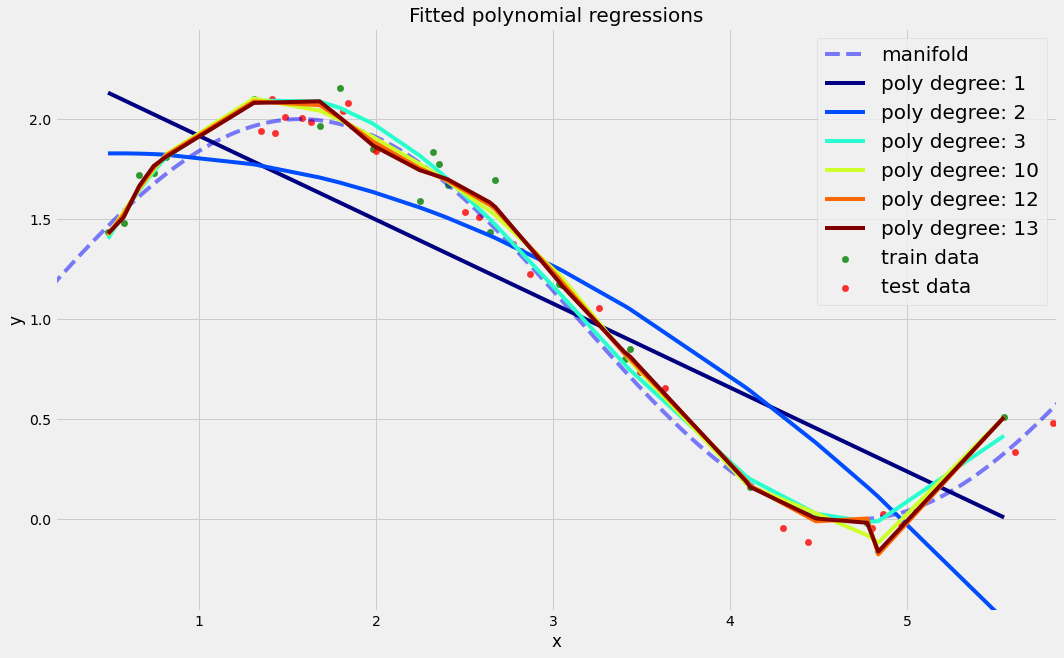

In [20]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='train data')
plt.scatter(data['x_test'], data['y_test'], 40, 'r', 'o', alpha=0.8, label='test data')

# save weights of all fitted polynomial regressions
w_list = []
train_err = []
test_err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist_train = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: np.power(data['x_train'], n), range(1, degree + 1)))
    dlist_test = [np.ones(data['x_test'].shape[0])] + \
            list(map(lambda n: np.power(data['x_test'], n), range(1, degree + 1)))
    X = np.array(dlist_train).T
    X_test = np.array(dlist_test).T
    
    q, r = np.linalg.qr(X)
    w = np.dot(np.dot(np.linalg.inv(r), q.T), data['y_train'])
    w_list.append((degree, w))
    
    h = np.dot(w, X.T)
    h_test = np.dot(w, X_test.T)
    
    
    train_err.append(np.mean((data['y_train'] - h)**2))
    test_err.append(np.mean((data['y_test'] - h_test)**2))
    
#     dlist_all = [np.ones(data['support'].shape[0])] + \
#             list(map(lambda n: np.power(data['support'], n), range(1, degree + 1)))
#     X_all = np.array(dlist_all).T
#     h = np.dot(w, X_all.T)
#     plt.plot(data['support'], h, color=colors[ix], label='poly degree: %i' % degree)
        
    
    plt.plot(data['x_train'], h, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [21]:
results = pd.DataFrame({"degree": degree_list, "train_err": train_err, "test_err": test_err})
results

,degree,train_err,test_err
0,1,0.153086,0.141817
1,2,0.114404,0.258078
2,3,0.008543,0.017522
3,10,0.005878,4.522883
4,12,0.005180,5286.602084
5,13,0.005043,278.691178


Подивимося на значення параметрів, які ми вивчили:

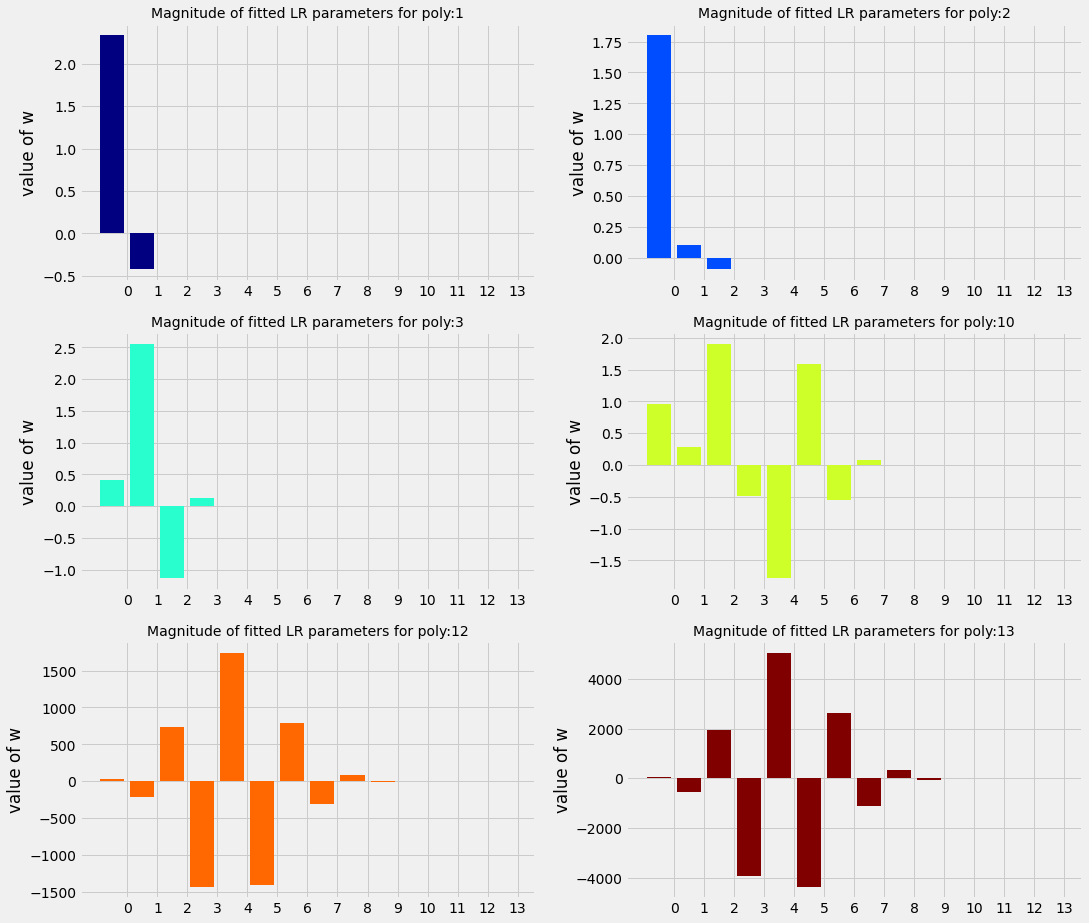

In [22]:
plt.figure(figsize=(16, 15))
for ix, t in enumerate(w_list):
    degree, w = t
    ax = plt.subplot(3, 2, ix+1)
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree, fontsize=14)
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))

# Регуляризація

Симптоми перенавчання видно неозброєним поглядом: вивчена функція інтерполює дані (намагається пройти майже через кожну точку даних). Також ми бачимо, що абсолютні значення ваг зростають разом із збільшенням ступеня полінома. Що якщо ми накладемо якийсь штраф на амплітуду ваги? У загальному випадку штраф виглядає так:
$$\large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$$
де:
* $\large \lambda$ - це параметр регуляризації.

# $L_2$ регуляризація

Спробуємо додати обмеження на $L_2$ норму вектора параметрів моделі:

$$\large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$$

тоді цільова функція набуде вигляду:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}$$

Як і раніше, продиференціюємо за параметрами $\large \vec{w}$:
$$\large \begin{array}{rcl}\Large \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \left(\frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}\right) \\
&=& \frac{\partial}{\partial \vec{w}}\left( \frac{1}{2} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w} \right) \\
&=& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w}
\end{array}$$

і порахуємо рішення:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} + \lambda \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(X^T X + \lambda E\right) \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X + \lambda E\right)^{-1} X^T \vec{y}
\end{array}$$

Така регресія називається гребеневою регресією (**Ridge regression**). При увеличении параметра регуляризации, матрица $X^T X + \lambda E$ становится "менее сингулярной", т.е. **регулярной**, а задача становится более определенной. Для такой матрицы число обусловленности будет равно: $\dfrac{e_\text{max}+λ}{e_\text{min}+λ}$, где $e_x$ — это собственные числа матрицы. Таким образом, увеличивая параметр регуляризации мы уменьшаем число обусловленности.

У разі збільшення параметра регуляризації, матриця $X^T X + \lambda E$ стає "менш сингулярною", тобто **регулярною**. Для такої матриці число обумовленості дорівнюватиме: $\dfrac{e_\text{max}+λ}{e_\text{min}+λ}$, де $e_x$ — це власні числа матриці. Таким чином, збільшуючи параметр регуляризації, ми зменшуємо число обумовленості.

![ridge](https://github.com/mephistopheies/mlworkshop39_042017/raw/a6426fd652faa38864c3ea4538e000539106fb56/1_ml_intro/ipy/images/l2reg.png)

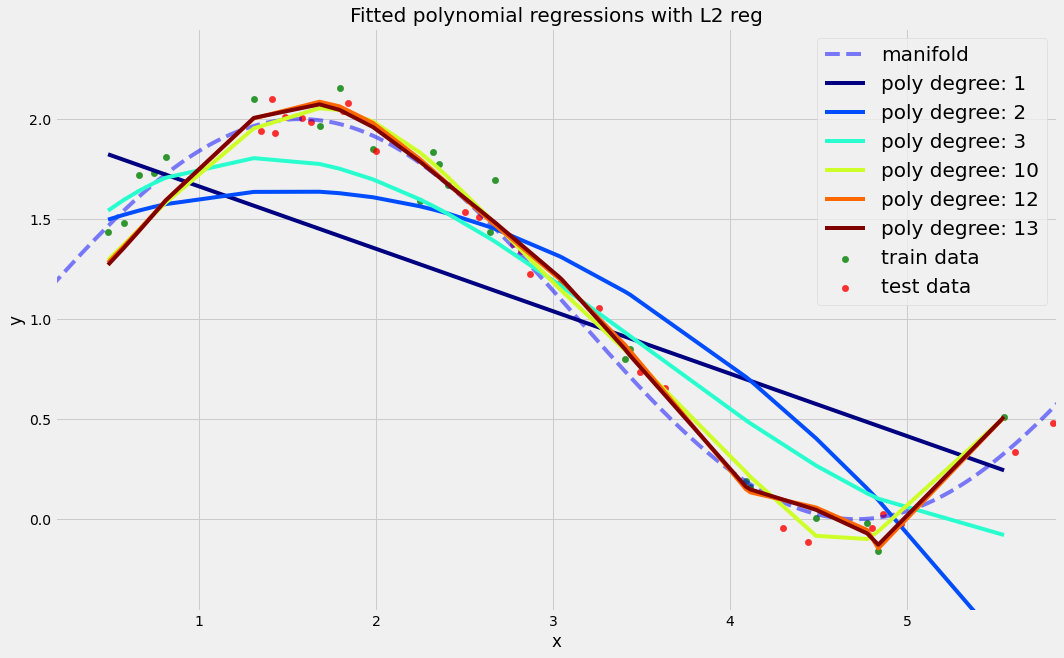

In [23]:
# define regularization parameter
lmbd = 1

degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='train data')
plt.scatter(data['x_test'], data['y_test'], 40, 'r', 'o', alpha=0.8, label='test data')

w_list_l2 = []
train_err = []
test_err = []
for ix, degree in enumerate(degree_list):
    dlist_train = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: np.power(data['x_train'], n), range(1, degree + 1)))
    dlist_test = [np.ones(data['x_test'].shape[0])] + \
            list(map(lambda n: np.power(data['x_test'], n), range(1, degree + 1)))
    X = np.array(dlist_train).T
    X_test = np.array(dlist_test).T
    
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    w_list_l2.append((degree, w))
    
    h = np.dot(w, X.T)
    h_test = np.dot(w, X_test.T)
    
    train_err.append(np.mean((data['y_train'] - h)**2))
    test_err.append(np.mean((data['y_test'] - h_test)**2))
    
    
#     dlist_all = [np.ones(data['support'].shape[0])] + \
#             list(map(lambda n: np.power(data['support'], n), range(1, degree + 1)))
#     X_all = np.array(dlist_all).T
#     h = np.dot(w, X_all.T)
#     plt.plot(data['support'], h, color=colors[ix], label='poly degree: %i' % degree)
    
    plt.plot(data['x_train'], h, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L2 reg', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [24]:
results = pd.DataFrame({"degree": degree_list, "train_err": train_err, "test_err": test_err})
results

,degree,train_err,test_err
0,1,0.182867,0.201764
1,2,0.134022,0.344894
2,3,0.052921,0.079003
3,10,0.016460,1.841454
4,12,0.014897,102.644204
5,13,0.014767,4.364228


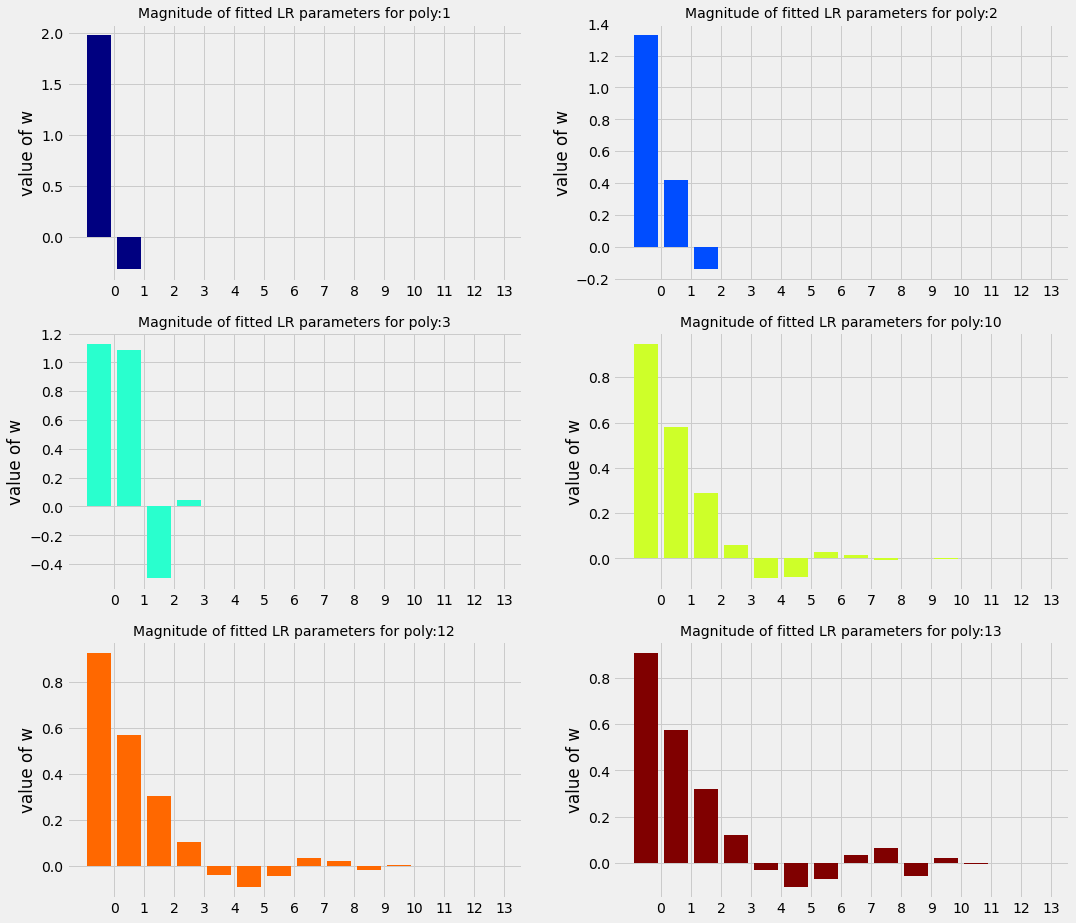

In [25]:
plt.figure(figsize=(16, 15))
for ix, t in enumerate(w_list_l2):
    degree, w = t
    ax = plt.subplot(3, 2, ix+1)
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree, fontsize=14)
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))

# $L_1$ регуляризація

також відома як **Lasso** (least absolute shrinkage and selection operator)

Додамо обмеження на $L_1$ норму вектора параметрів:

$$\large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$$

цільова функція набуде вигляду:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$$

На жаль, завдання у цьому виді не має загального аналітичного рішення, але ми можемо скористатися методом градієнтного спуску для пошуку оптимального значення параметрів моделі:

$$\large \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \lambda \text{sign}(\vec{w})$$

Формула для ітеративного оновлення ваг:
$$\large \vec{w}_{\text{new}} := \vec{w} - \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$$
где:
* $\large \alpha$ - це швидкість навчання (*learning rate*).

In [26]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T

# define MSE function to evaluate model
# we expect that durint training process this value will be decreasing
def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

# initial weights of the model
w = np.array([-1.0] * X.shape[1])
# w = np.random.normal(size=X.shape[1])

# maximim number of iterations
n_iter = 20
# alpha or learning rate
lr = 0.00000001
# we will keep all MSE values to plot graph
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print(loss[-1])

1.3051230956770203e+38
1.2197910238566862e+58
1.1400381671352446e+78
1.0654997430754898e+98
9.958348195892061e+117
9.30724755544128e+137
8.698717433278894e+157
8.129974467026255e+177
7.598417277199043e+197
7.101614568730044e+217
6.637294010442865e+237
6.203331841612278e+257
5.79774315807251e+277
5.418672833443038e+297
inf
inf
inf
inf
inf
inf


/Users/terpiljenya/projects/machine_learning_projector/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':


# Нормалізація даних

Щоб уникнути розбіжності алгоритму градієнтного спуску і вирівняти амплітуду ознак ми можемо привести всі ознаки до єдиного стандарту: щоб середнє значення ознак дорівнювало нулю, а дисперсія одиниці. Для цього потрібно від кожної ознаки відняти середнє (по стовпцю) і розділити на стандартне відхилення. Параметри перетворення ми обчислюємо на тренувальному наборі даних:

$$\large \begin{array}{rcl} \overline{\mu}_{\cdot j} &=& \frac{1}{n} \sum_{i=1}^n x_{ij} \\
\overline{\sigma}_{\cdot j} &=& \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)}
\end{array}$$

а застосовуємо як до тренувального, так і до тестового.:

$$\large \vec{x}_{\text{new}} = \frac{\vec{x} - \overline{\mu}}{\overline{\sigma}}$$

In [27]:
# import norm class from scipy
from scipy.stats import norm

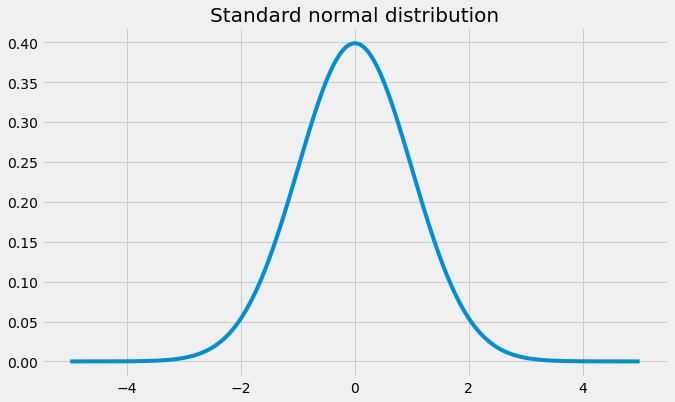

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-5, 5, 1000), norm.pdf(np.linspace(-5, 5, 1000)))
plt.title('Standard normal distribution', fontsize=20)
plt.show()

X mean:
[2.61717625e+00 8.89178866e+00 3.46858633e+01 1.47337824e+02
 6.62964718e+02 3.10664370e+03 1.49946179e+04 7.40097896e+04
 3.71757450e+05 1.89408958e+06 9.76488362e+06 5.08473839e+07
 2.67042329e+08]
X std
[1.42904764e+00 8.26280332e+00 4.36295151e+01 2.28694895e+02
 1.20605446e+03 6.41842261e+03 3.44672461e+04 1.86543640e+05
 1.01602565e+06 5.56120143e+06 3.05530627e+07 1.68325268e+08
 9.29250585e+08]


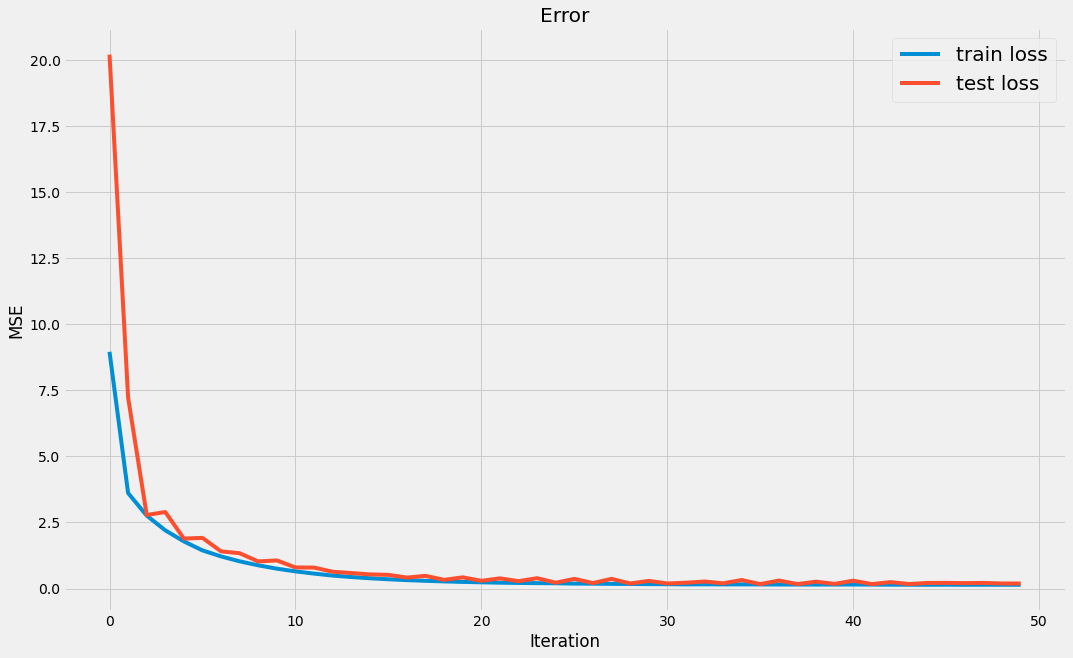

In [29]:
lmbd = 0.1
degree = 13


dlist = list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T

dlist_test = list(map(lambda n: data['x_test']**n, range(1, degree + 1)))
X_test = np.array(dlist_test).T



# compute sample mean
x_mean = X.mean(axis=0)
print('X mean:')
print(x_mean)
# compute sample std
x_std = X.std(axis=0)
print('X std')
print(x_std)
# apply transformation
X = (X - x_mean)/x_std
X_test = (X_test - x_mean)/x_std
         
# add bias
X = np.column_stack((np.ones(X.shape[0]), X))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))
         

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])

n_iter = 50
lr = 0.1
train_loss = []
test_loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    h = np.dot(X, w)
    h_test = np.dot(w, X_test.T)
    train_loss.append(mse(data['y_train'], h))
    test_loss.append(mse(data['y_test'], h_test))

plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title('Error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend(loc='upper right', prop={'size': 20})
plt.show()

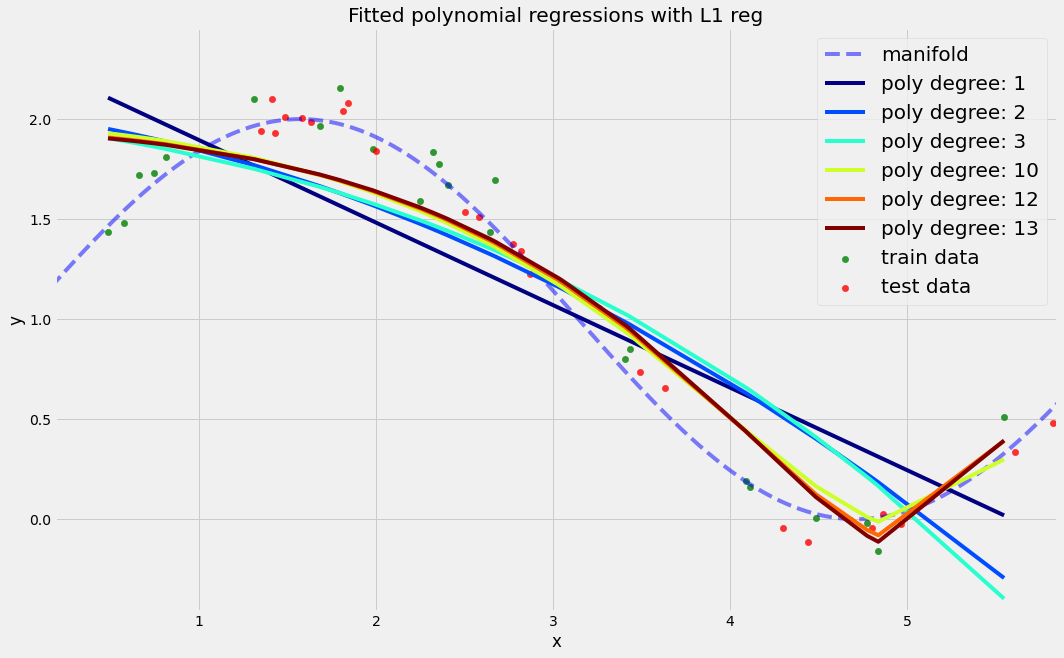

In [30]:
degree_list = [1, 2, 3, 10, 12, 13]
lmbd = 0.01
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='train data')
plt.scatter(data['x_test'], data['y_test'], 40, 'r', 'o', alpha=0.8, label='test data')

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
    w = np.array([-1.0] * X.shape[1])
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss
    
w_list_l1 = []
train_err = []
test_err = []
for ix, degree in enumerate(degree_list):
    dlist = list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    
    dlist_test = list(map(lambda n: data['x_test']**n, range(1, degree + 1)))
    X_test = np.array(dlist_test).T
    
    # normalization
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - x_mean)/x_std
    X_test = (X_test - x_mean)/x_std
    
    # add bias
    X = np.column_stack((np.ones(X.shape[0]), X))
    X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))
    
    # train regression
    w, h, loss = fit_lr_l1(X, data['y_train'], lmbd=lmbd)
    h_test = np.dot(X_test, w)
    train_err.append(np.mean((data['y_train'] - h)**2))
    test_err.append(np.mean((data['y_test'] - h_test)**2))
    
    w_list_l1.append((degree, w))
    
#     dlist_all = list(map(lambda n: data['support']**n, range(1, degree + 1)))
#     X_all = np.array(dlist_all).T
#     X_all = (X_all - x_mean)/x_std
#     X_all = np.column_stack((np.ones(X_all.shape[0]), X_all))
    
#     h = np.dot(w, X_all.T)
#     plt.plot(data['support'], h, color=colors[ix], label='poly degree: %i' % degree)
    plt.plot(data['x_train'], h, color=colors[ix], label='poly degree: %i' % degree)
    
    

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L1 reg')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [31]:
results = pd.DataFrame({"degree": degree_list, "train_err": train_err, "test_err": test_err})
results

,degree,train_err,test_err
0,1,0.153287,0.145544
1,2,0.121709,0.194630
2,3,0.124360,0.234734
3,10,0.060527,0.064010
4,12,0.054660,0.139713
5,13,0.053559,0.178708


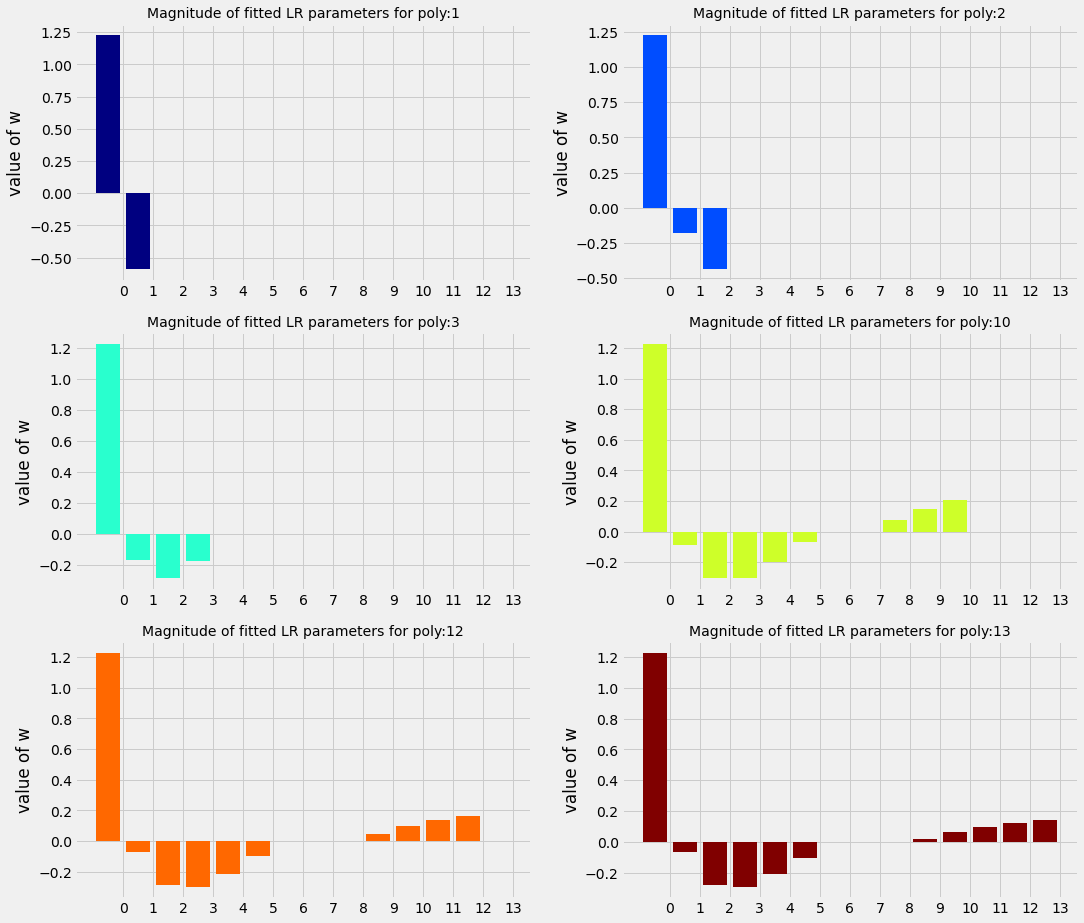

In [32]:
plt.figure(figsize=(16, 15))
for ix, t in enumerate(w_list_l1):
    degree, w = t
    ax = plt.subplot(3, 2, ix+1)
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree, fontsize=14)
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))

## Bias-Variance Decomposition

[Bias–variance tradeoff](https://mlu-explain.github.io/bias-variance/)

Давайте поговоримо про властивості помилок передбачення лінійної регресії (насправді, це обговорення справедливо для всіх алгоритмів машинного навчання).



Ми хочемо знайти функцію $\hat {f}(x)$, яка апроксимує справжню функцію $ f(x)$ настільки добре, наскільки можливо, у сенсі деякого алгоритму навчання. Ми робимо поняття «настільки добре, наскільки можливо» точним шляхом виміру середньоквадратичної помилки між $y$ і $\hat {f}$ — ми хочемо, щоб значення $(y-{\hat {f}}(x))^{ 2}$ було мінімальним як для точок $ x_{1},\dots ,x_{n}$, так і поза нашої вибірки. Звичайно, ми не можемо зробити це ідеально, оскільки $ y_{i}$ містить шум $ \epsilon $ . Це означає, що ми мусимо бути готові допустити незнижувану похибку в будь-якій функції, яку б ми не придумали.


Пошук функції $\hat {f}$, яка узагальнюється для точок поза тренувальним набором даних, може бути здійснений будь-яким з незліченної кількості алгоритмів, що використовуються для навчання з учителем. Виявляється, що хоч би яку функцію $\hat {f}$ ми вибрали, ми можемо розкласти її очікувану помилку на непроглянутому екземплярі даних $\vec x$ таким чином:

\begin{aligned}\operatorname {E} {\Big [}{\big (}y-{\hat {f}}(\vec x){\big )}^{2}{\Big ]}&={\Big (}\operatorname {Bias} {\big [}{\hat {f}}(\vec x){\big ]}{\Big )}^{2}+\operatorname {Var} {\big [}{\hat {f}}(\vec x){\big ]}+\sigma ^{2}\\\end{aligned}

де

\begin{aligned}\operatorname {Bias} {\big [}{\hat {f}}(\vec x){\big ]}=\operatorname {E} {\big [}{\hat {f}}(\vec x)-f(\vec x){\big ]}\end{aligned}

і

\begin{aligned}\operatorname {Var} {\big [}{\hat {f}}(\vec x){\big ]}=\operatorname {E} [{\hat {f}}(\vec x)^{2}]-{\Big (}\operatorname {E} [{\hat {f}}(\vec x)]{\Big )}^{2}\end{aligned} 

Математичне сподівання пробігає різні варіанти вибору тренувального набору даних, всі вибрані з одного й того ж (умовного) розподілу $ P(x,y)$. Ці три члени представляють:

- квадрат зміщення: $\text{Bias}\left(\hat{f}(\vec x) \right)$ – середня помилка за всілякими наборами даних;
- дисперсію: $\text{Var}\left(\hat{f}(\vec x) \right)$ – варіативність помилки, наскільки помилка буде відрізнятися, якщо навчати модель на різних наборах даних;
- незнижувальну похибку: $\sigma^2$.

![Bias–variance tradeoff](https://habrastorage.org/webt/mp/jr/fo/mpjrfodzlknbpirv2rs8fxf8-rs.png)

In [33]:
import pandas as pd

(30000, 2)


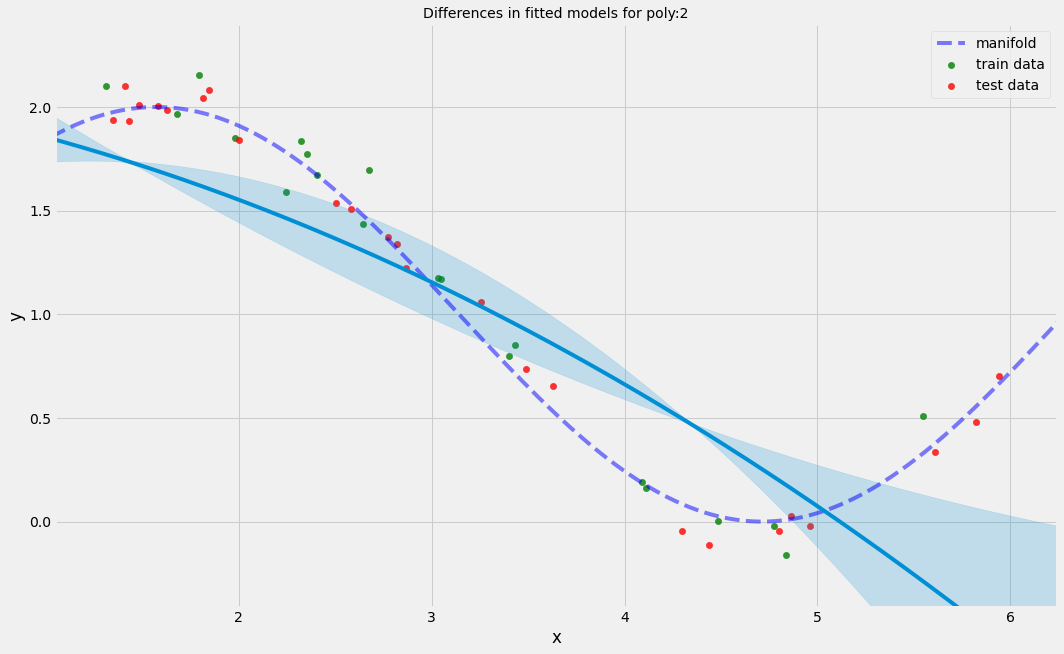

(30000, 2)


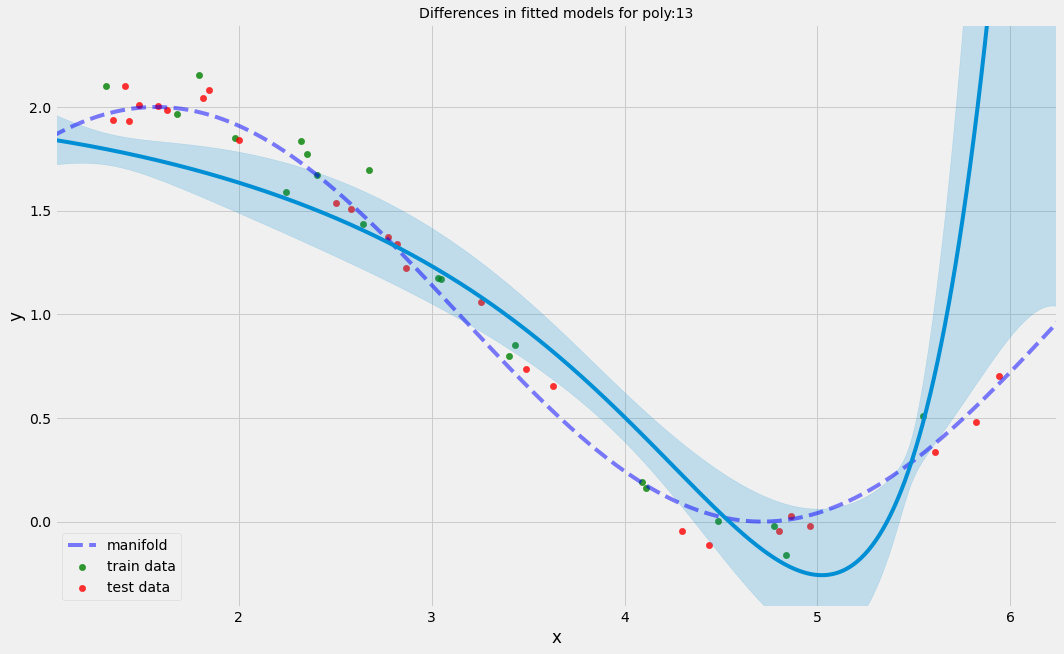

In [34]:
def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
#     w = np.array([-1.0] * X.shape[1])
    w = np.random.random((X.shape[1],))*4 - 2
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss

w_list_l1 = []
err = []

degree_list = [2, 13]
lmbd = 0.01

n_repetition = 30

for ix, degree in enumerate(degree_list):
    rez = []
    for _ in range(n_repetition):
        dlist = list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
        X = np.array(dlist).T
        
        dlist_all = list(map(lambda n: data['support']**n, range(1, degree + 1)))
        X_all = np.array(dlist_all).T

        # normalization
        x_mean = X.mean(axis=0)
        x_std = X.std(axis=0)
        X = (X - x_mean)/x_std
        X_all = (X_all - x_mean)/x_std

        # add bias
        X = np.column_stack((np.ones(X.shape[0]), X))
        X_all = np.column_stack((np.ones(X_all.shape[0]), X_all))
        
        # train regression
        w, h, loss = fit_lr_l1(X, data['y_train'], lmbd=lmbd, n_iter=50)
    
        w_list_l1.append((degree, w))
        err.append(np.mean((data['y_train'] - h)**2))
        
        h_all = np.dot(w, X_all.T)
        rez += [{'x': x, 'y': y} for x, y in  zip(data['support'], h_all)]
    rez = pd.DataFrame(rez)
    print(rez.shape)
    plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='train data')
    plt.scatter(data['x_test'], data['y_test'], 40, 'r', 'o', alpha=0.8, label='test data')
    plt.title('Differences in fitted models for poly:%i' % degree, fontsize=14)
    plt.xlim(data['x_test'].min() - margin, data['x_test'].max() + margin)
    plt.ylim(data['y_test'].min() - margin, data['y_test'].max() + margin)

    sns.lineplot(x=rez['x'], y=rez['y'], ci="sd", palette=['g'])
    plt.show()


Links:
* [cs229 by Andrew Ng](https://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf)
* [A Visual Introduction To Linear Regression](https://mlu-explain.github.io/linear-regression/)
* [The bias variance tradeoff](https://mlu-explain.github.io/bias-variance/)
* [Regression diagnostics:  testing the assumptions of linear regression](https://people.duke.edu/~rnau/testing.htm)



based on https://mlcourse.ai/book/topic04/topic4_linear_models_part1_mse_likelihood_bias_variance.html by Pavel Nesterov 